In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split() splits training and test datasets in defualt (75%/ 25%) and also SHUFFLEs them

## 1. Load Dataset
## 2. Cancer Data Analysis

In [29]:
cancer = datasets.load_breast_cancer()
cancer
# Same way of using cancer dataset

cancer = load_breast_cancer()
cancer
# In cancer, there are data in array, target(label), features

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [32]:
dir(cancer)

# dir() shows the keys (from tuple format) in the dataset

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [33]:
print(cancer.DESCR) 

# Gives overall descriptions and can get Summary Statistics of the features (Min, Max)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [26]:
print(cancer.data)
print(cancer.target)

np.bincount(cancer.target)     
# np.bincount( ) counts the number in each  target[0] malignant  | target[1] benign

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

array([212, 357], dtype=int64)

In [31]:
print(cancer.target_names)
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
for i, name in enumerate(cancer.feature_names):
    print('%02d: %s' %(i, name))
    
# Using enumerate() to visualise cancer.feature_names with indexes 

00: mean radius
01: mean texture
02: mean perimeter
03: mean area
04: mean smoothness
05: mean compactness
06: mean concavity
07: mean concave points
08: mean symmetry
09: mean fractal dimension
10: radius error
11: texture error
12: perimeter error
13: area error
14: smoothness error
15: compactness error
16: concavity error
17: concave points error
18: symmetry error
19: fractal dimension error
20: worst radius
21: worst texture
22: worst perimeter
23: worst area
24: worst smoothness
25: worst compactness
26: worst concavity
27: worst concave points
28: worst symmetry
29: worst fractal dimension


## 3. Train, Test Data Shuffle
## 4. Model Generator (DecisionTreeClassifier) and train
## 5. Predict
## 6. Evaluation

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X.data, y, test_size=0.2)
# SHUFFLE Train, Test dataset
# Test datastet will be 20%  but in default it's 75% Training data and 25% Testing data

cancer_tree = DecisionTreeClassifier()
# Pruning must be done to avoid OVERFITTING
# When generating a DecisionTree model, max_depth and min_sample_split hyper-parameters can be used to avoid overfitting

cancer_tree.fit(X_train, y_train)

pred=cancer_tree.predict(X_test)
score = accuracy_score(y_test, pred)
# Using accuracy_score from sklean.metrics
score

0.9385964912280702

## 7. Feature Importances

In [41]:
print('Feature Importances : \n{}'.format(cancer_tree.feature_importances_))

Feature Importances : 
[0.         0.0112429  0.         0.         0.00780757 0.
 0.00149459 0.01589744 0.00780757 0.         0.00905538 0.
 0.         0.00301409 0.00152463 0.         0.         0.
 0.         0.         0.         0.02424512 0.02361953 0.13047385
 0.01653367 0.         0.01303154 0.72800609 0.00624605 0.        ]


## 8. Visualisation of Feature Importances

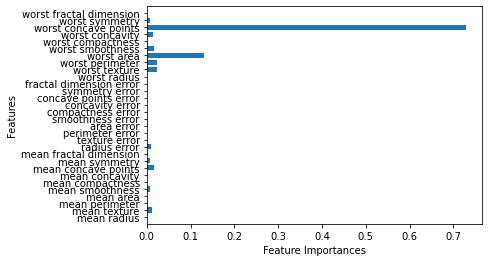

In [43]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1] 
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('Feature Importances')
    plt.ylabel('Features')
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(cancer_tree)

## 9. Graphviz Visualization

In [41]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

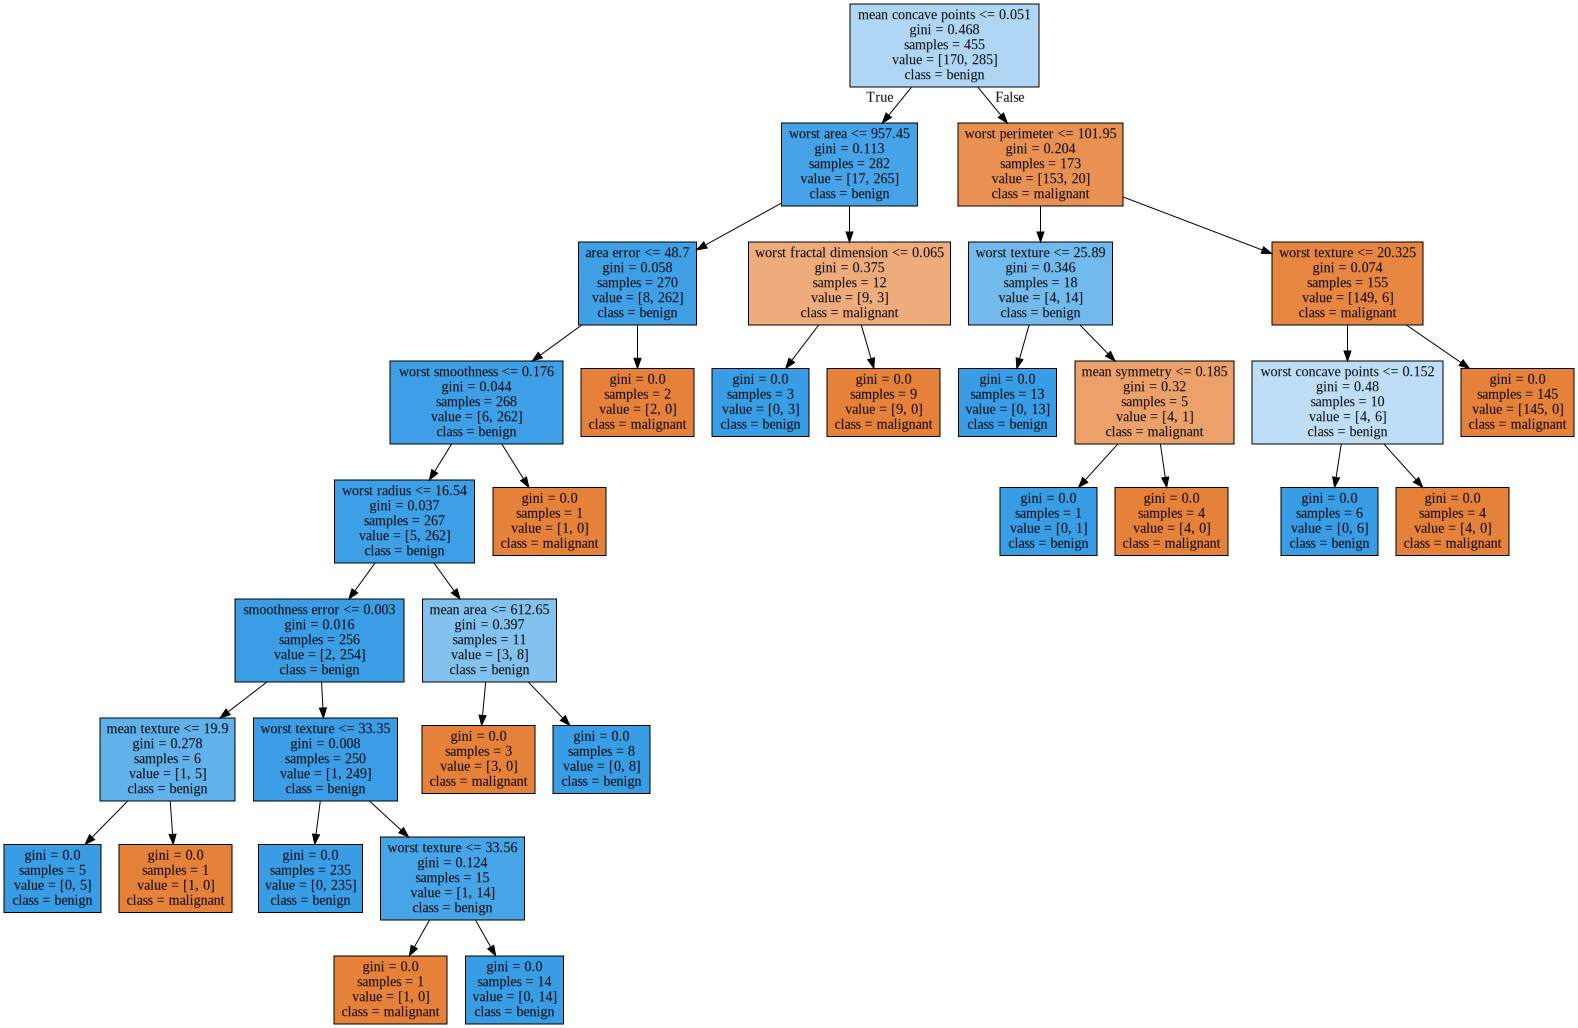

'cancer_tree.png.pdf'

In [44]:
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(dTree, out_file='cancer_tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                filled =True)
               #impurity=False)  # now showing the gini values

with open('cancer_tree.dot', encoding='utf-8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
display(dot)
dot.render(filename='cancer_tree.png')